In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from PIL import Image
import os

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Introduction to Tensorflow

For this talk, I wanted to go over the "next step" after completing some of the basic Tensorflow tutorials found on the website. Specifically this code base will cover how to read data from different data sources with random transformations, implementing a inception network, running transfer learning, and vizualizing the learned feautres. The slides for the presentation can be found in this repository.

## Importing the data

Lets start by reading in the data and saving it in the form of a .tfrecords binary file and as a directory.

In [2]:
from dataset_creation import create_data
create_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Test Bincount: [ 963 1111 1019 1024  967  890 1048 1057  941  980]
Valid Bincount: [491 574 510 461 496 468 490 573 475 462]
Train Bincount: [5449 6192 5461 5656 5361 4955 5338 5663 5409 5516]
Writing /home/pspitler3/MNIST/data/train.tfrecords
(55000, 28, 28)
(55000,)
Writing /home/pspitler3/MNIST/data/valid.tfrecords
(5000, 28, 28)
(5000,)
Writing /home/pspitler3/MNIST/data/test.tfrecords
(10000, 28, 28)
(10000,)
Test Bincount: [1028 1091 1042 1028  982  934  955 1002  967  971]
Valid Bincount: [493 593 487 524 524 454 496 518 442 469]
Train Bincount: [5382 6193 5461 5589 5318 4925 5425 5773 5416 5518]


## Run the models

Once the data is imported and saved, we can run the basic model, the inception model, and transfer the weights from the basic model to create a fully convolutional version of the basic model. The code will run the basic model then run it again with an updated learning rate. This illustrates a save/restore of the model.

For the semantic segmentation model it is of special note that the accuracy initializes very high. This is becuase we already learned the features in the basic_model code!

In [6]:
from models.base_convnet import basic_model

basic_model(lr=0.003, num_epochs=10)
basic_model(lr=0.001, num_epochs=2)

Model Initialized
Model Initialized
------------------------------------------
Examples/sec:  847.178397507
Sec/batch:  0.118038892746
Current epoch:  0.0
Current learning rate:  0.003
Minibatch loss at step 0 : 13.9045
Model saved in file:  ./base/base.ckpt
Validation accuracy:  10.92
------------------------------------------
Examples/sec:  3971.57791076
Sec/batch:  0.0251789093018
Current epoch:  0.5
Current learning rate:  0.003
Minibatch loss at step 275 : 1.92803
------------------------------------------
Examples/sec:  3932.84824844
Sec/batch:  0.025426864624
Current epoch:  1.0
Current learning rate:  0.003
Minibatch loss at step 550 : 1.19198
Model saved in file:  ./base/base.ckpt
Validation accuracy:  85.34
------------------------------------------
Examples/sec:  3879.26859722
Sec/batch:  0.025778055191
Current epoch:  1.5
Current learning rate:  0.003
Minibatch loss at step 825 : 0.700646
------------------------------------------
Examples/sec:  4154.70961735
Sec/batch:  0.

In [7]:
from models.inception_model import inception_model

inception_model(lr=0.0003, num_epochs=10)
inception_model(lr=0.0001, num_epochs=2)

Model Initialized
------------------------------------------
Examples/sec:  489.780513894
Sec/batch:  0.204173088074
Current epoch:  0.0
Current learning rate:  0.0003
Minibatch loss at step 0 : 4.4085
Model saved in file:  ./incept/incept.ckpt
Validation accuracy:  17.78
------------------------------------------
Examples/sec:  2939.43135867
Sec/batch:  0.0340201854706
Current epoch:  0.5
Current learning rate:  0.0003
Minibatch loss at step 275 : 0.312904
------------------------------------------
Examples/sec:  3111.17836426
Sec/batch:  0.032142162323
Current epoch:  1.0
Current learning rate:  0.0003
Minibatch loss at step 550 : 0.131214
Model saved in file:  ./incept/incept.ckpt
Validation accuracy:  96.96
------------------------------------------
Examples/sec:  3007.14377895
Sec/batch:  0.0332541465759
Current epoch:  1.5
Current learning rate:  0.0003
Minibatch loss at step 825 : 0.0478257
------------------------------------------
Examples/sec:  3247.59699886
Sec/batch:  0.030

In [8]:
from models.semantic_segmentation import semantic_segmentation

semantic_segmentation(lr=0.002, num_epochs=10)

Model Initialized
Semantic Segmentation Variables Restored
------------------------------------------
Examples/sec:  908.942049934
Sec/batch:  0.110018014908
Current epoch:  0.0
Current learning rate:  0.002
Minibatch loss at step 0 : 5.43553
Model saved in file:  ./sem_seg/sem_seg.ckpt
Validation accuracy:  12.36
------------------------------------------
Examples/sec:  2944.46636293
Sec/batch:  0.0339620113373
Current epoch:  0.5
Current learning rate:  0.002
Minibatch loss at step 275 : 1.90813
------------------------------------------
Examples/sec:  3530.6778006
Sec/batch:  0.0283231735229
Current epoch:  1.0
Current learning rate:  0.002
Minibatch loss at step 550 : 1.49584
Model saved in file:  ./sem_seg/sem_seg.ckpt
Validation accuracy:  89.2
------------------------------------------
Examples/sec:  3490.6282509
Sec/batch:  0.0286481380463
Current epoch:  1.5
Current learning rate:  0.002
Minibatch loss at step 825 : 1.04602
------------------------------------------
Examples/s

## Visualizing the Activations

This code base also illustrates the activation layers of a trained network.

img_0.png


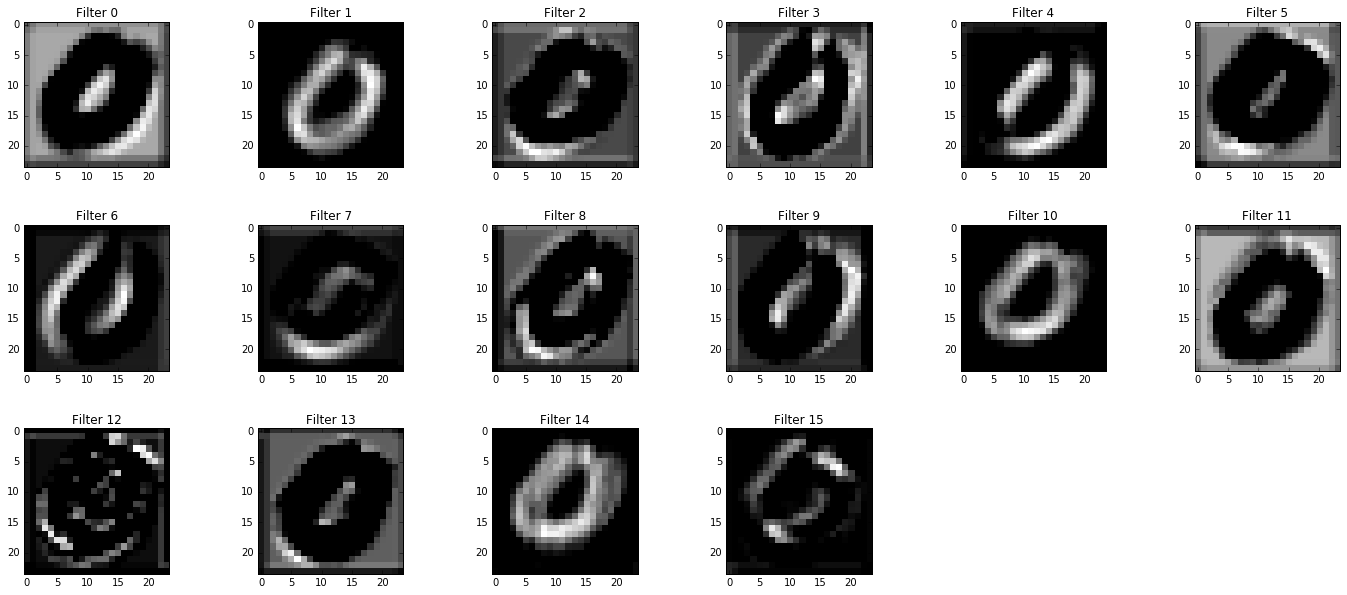

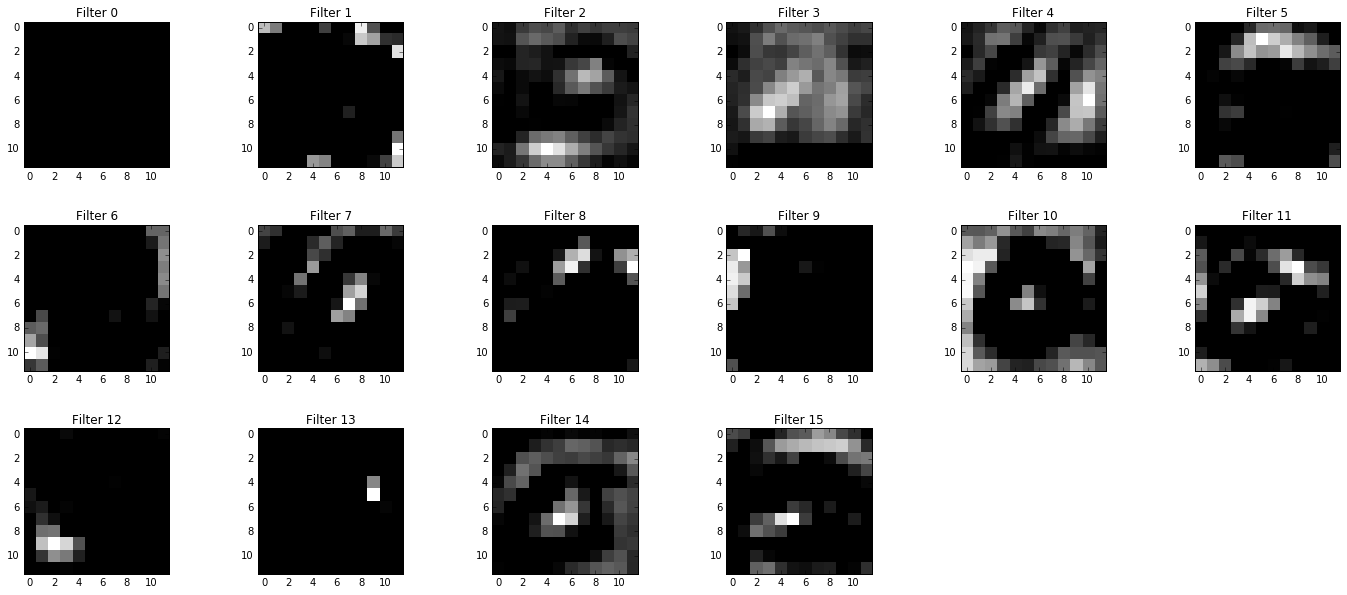

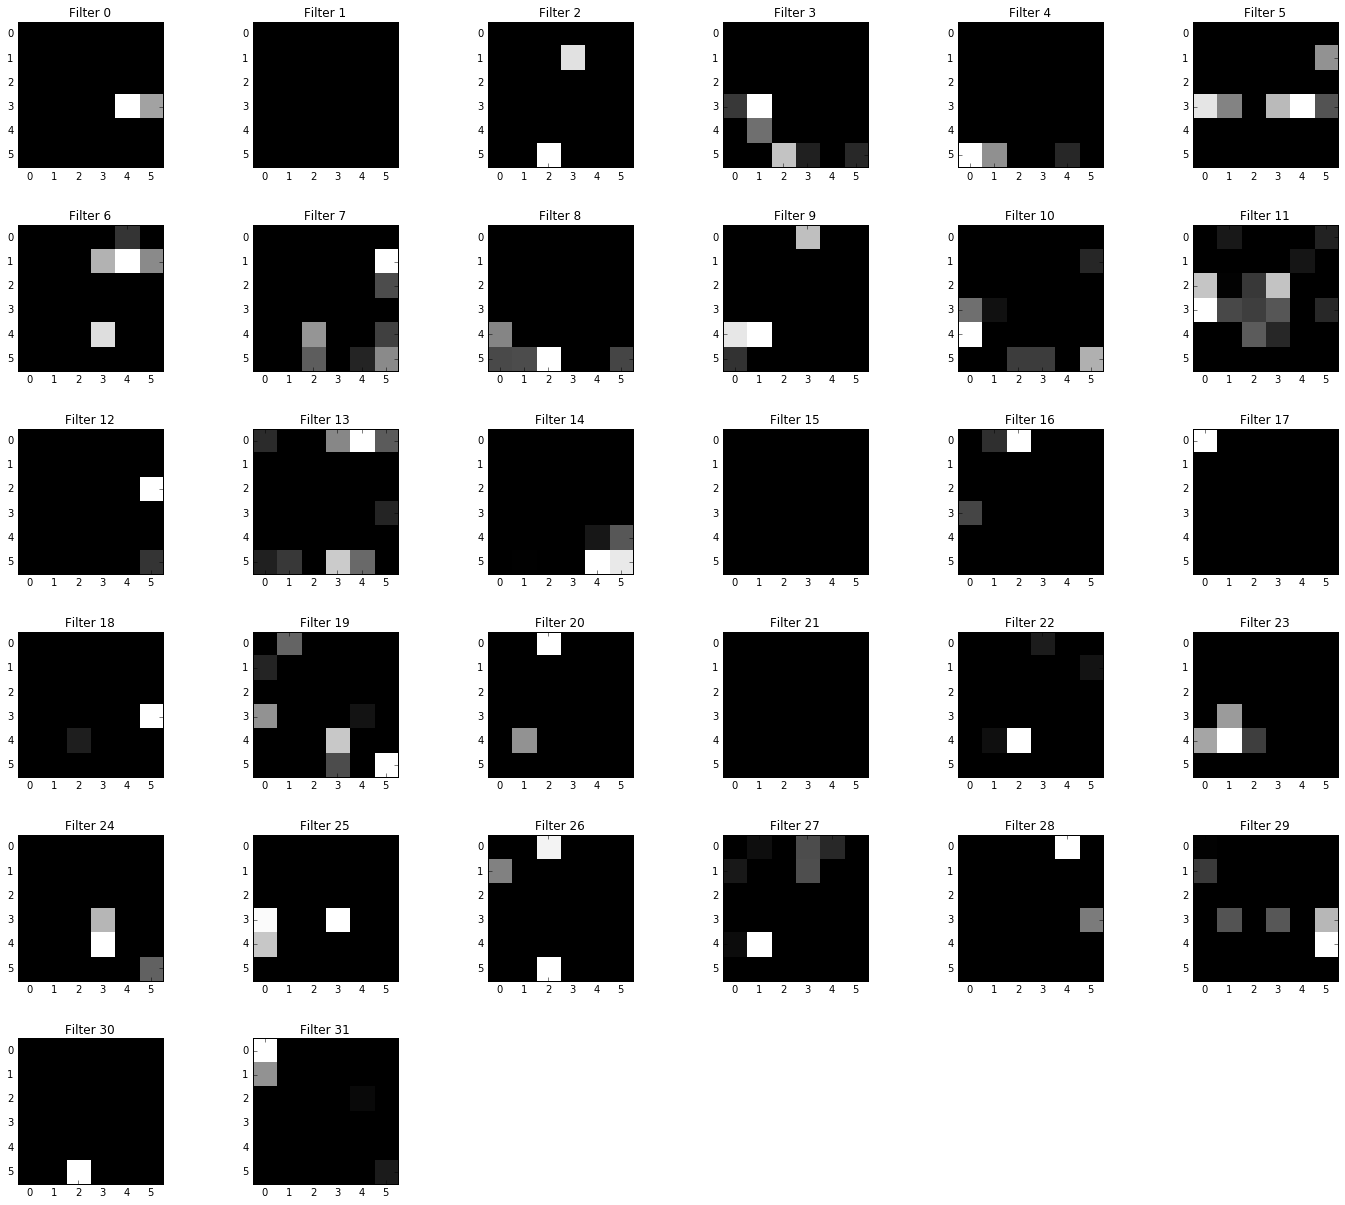

img_9.png


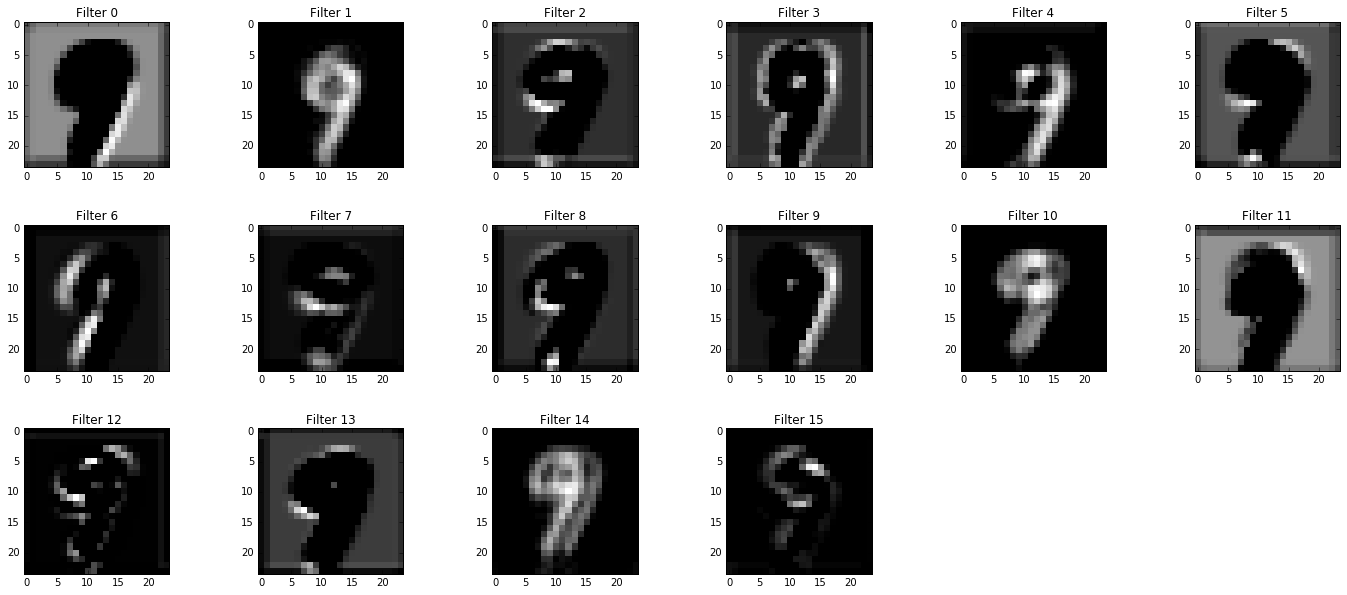

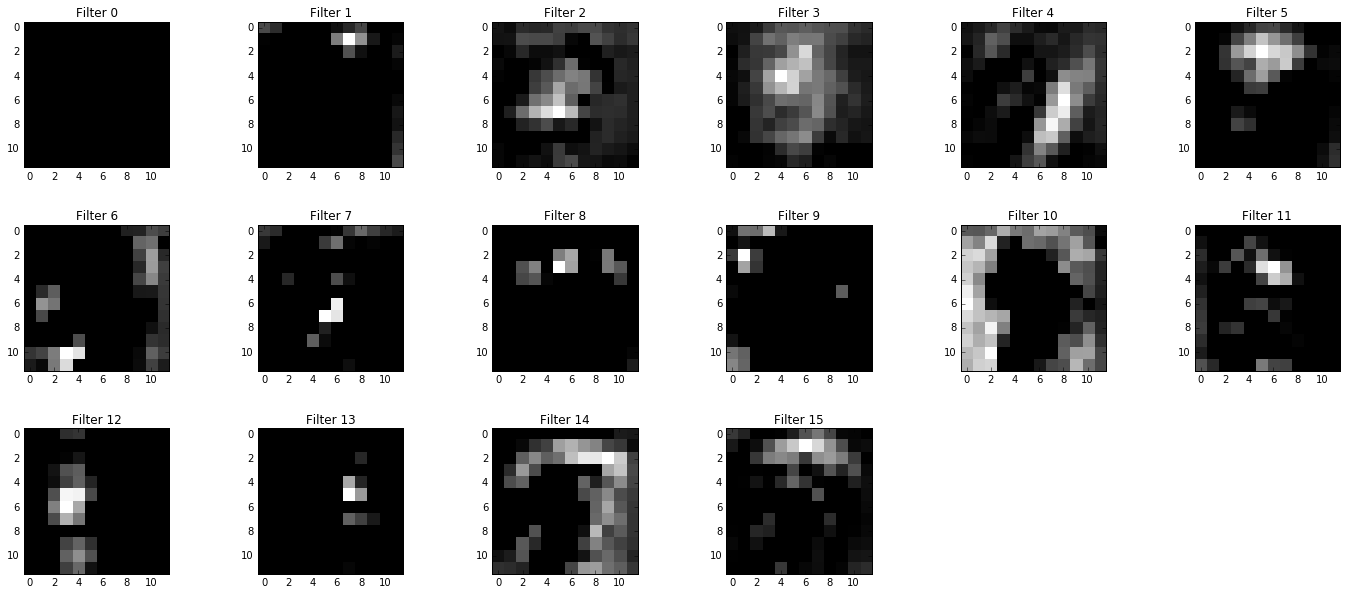

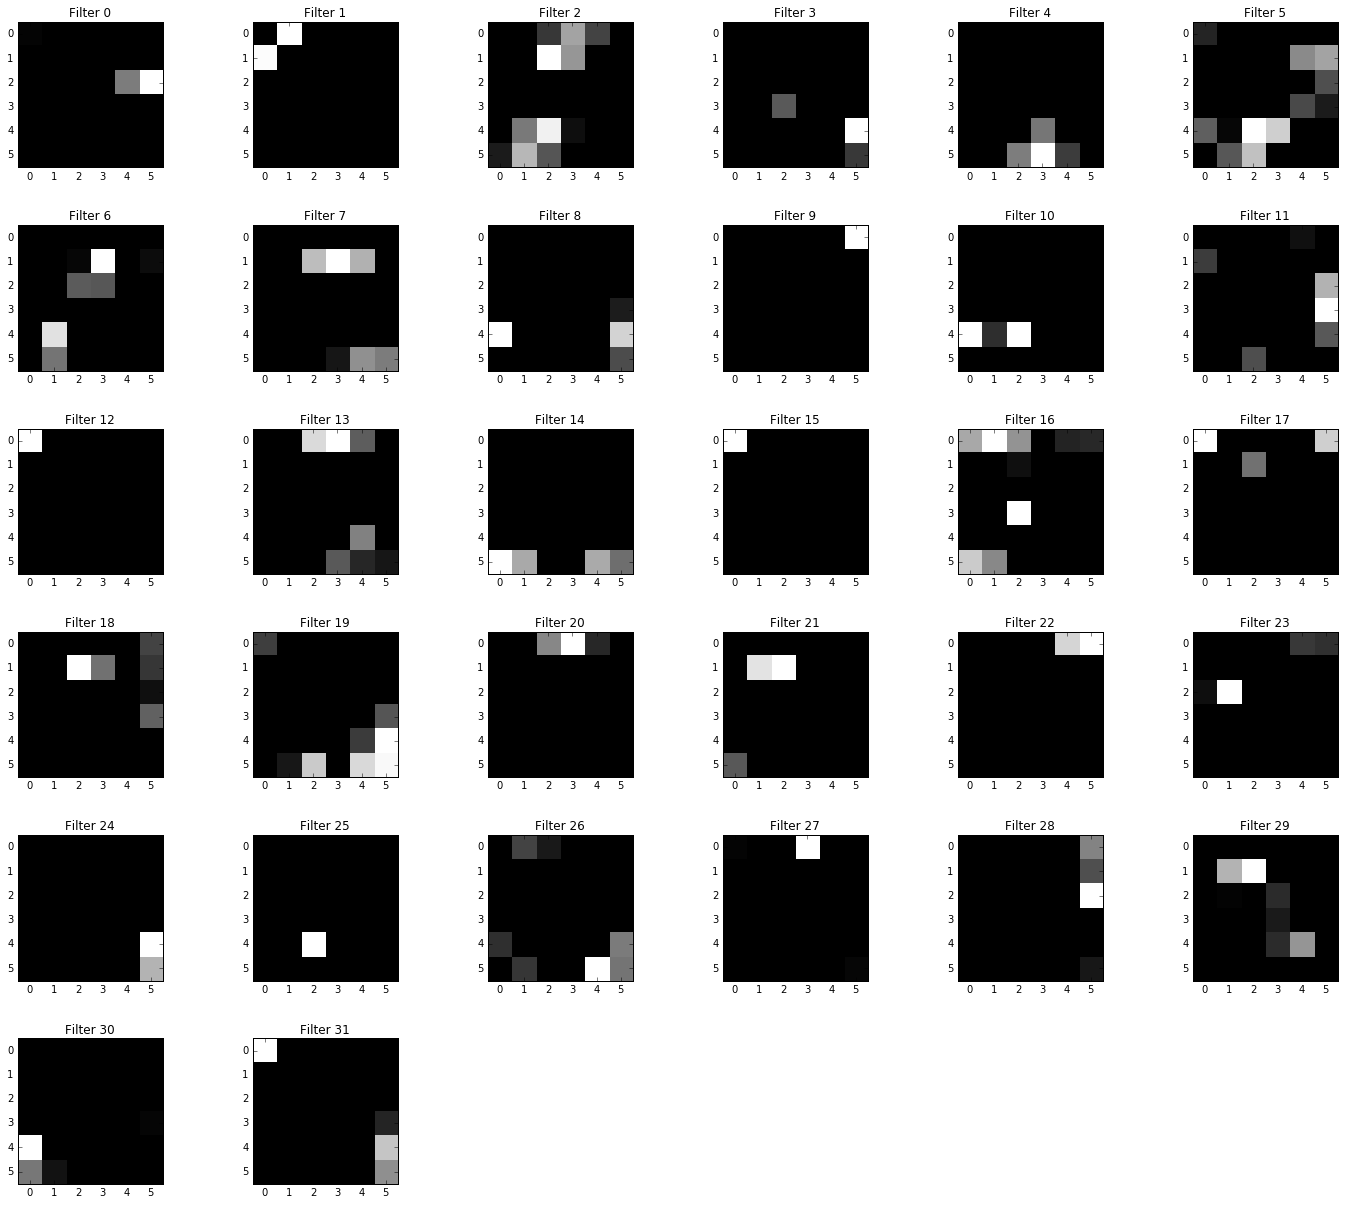

img_2.png


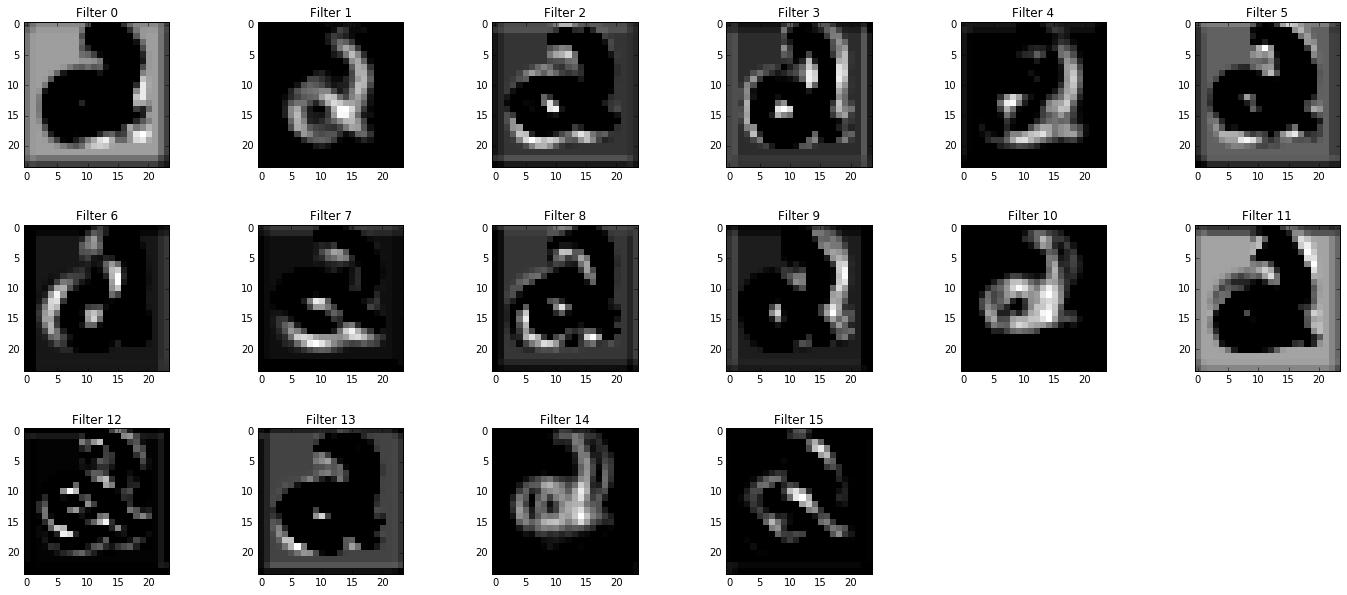

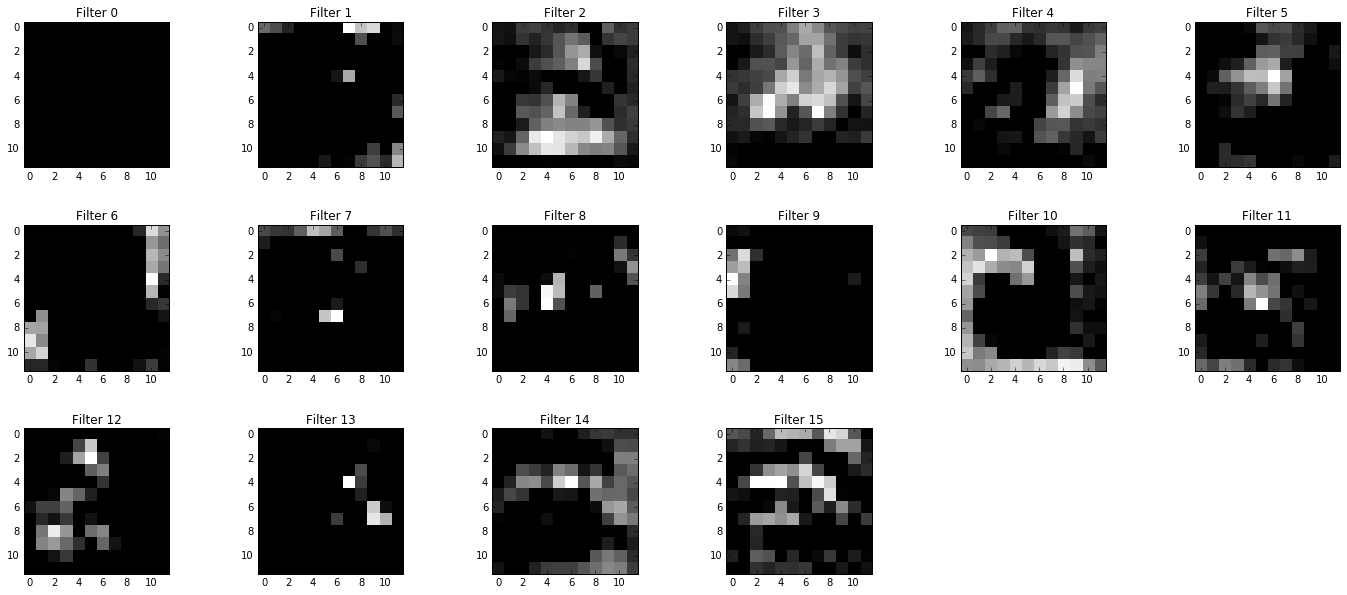

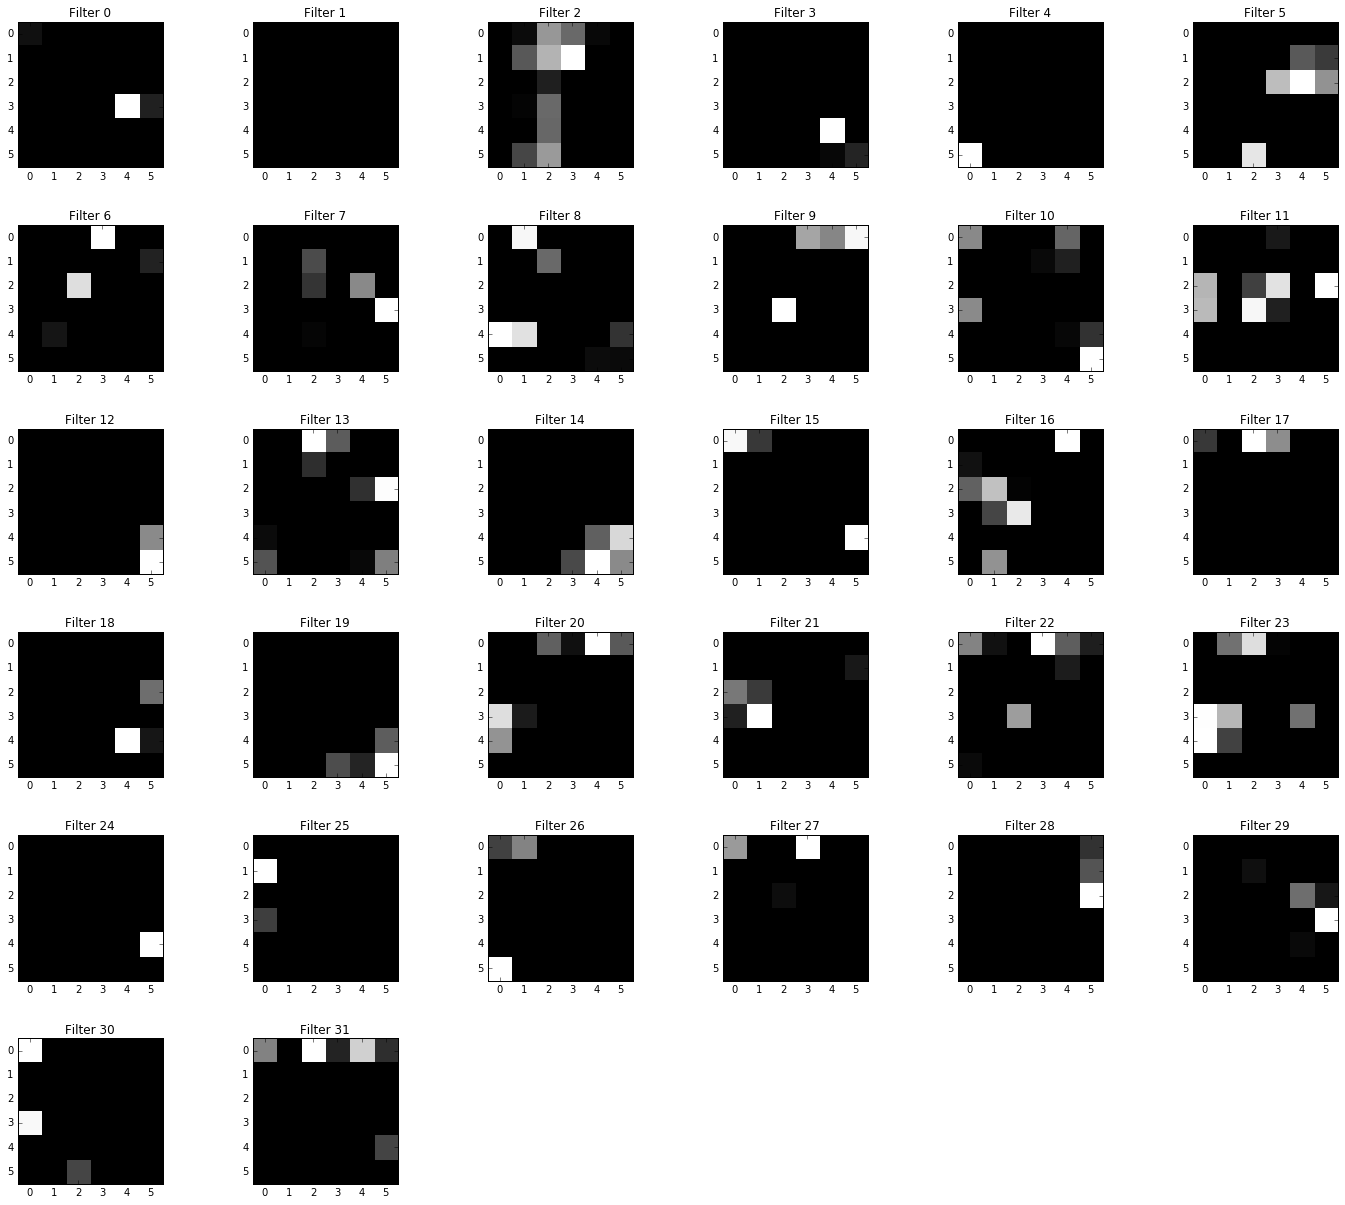

img_4.png


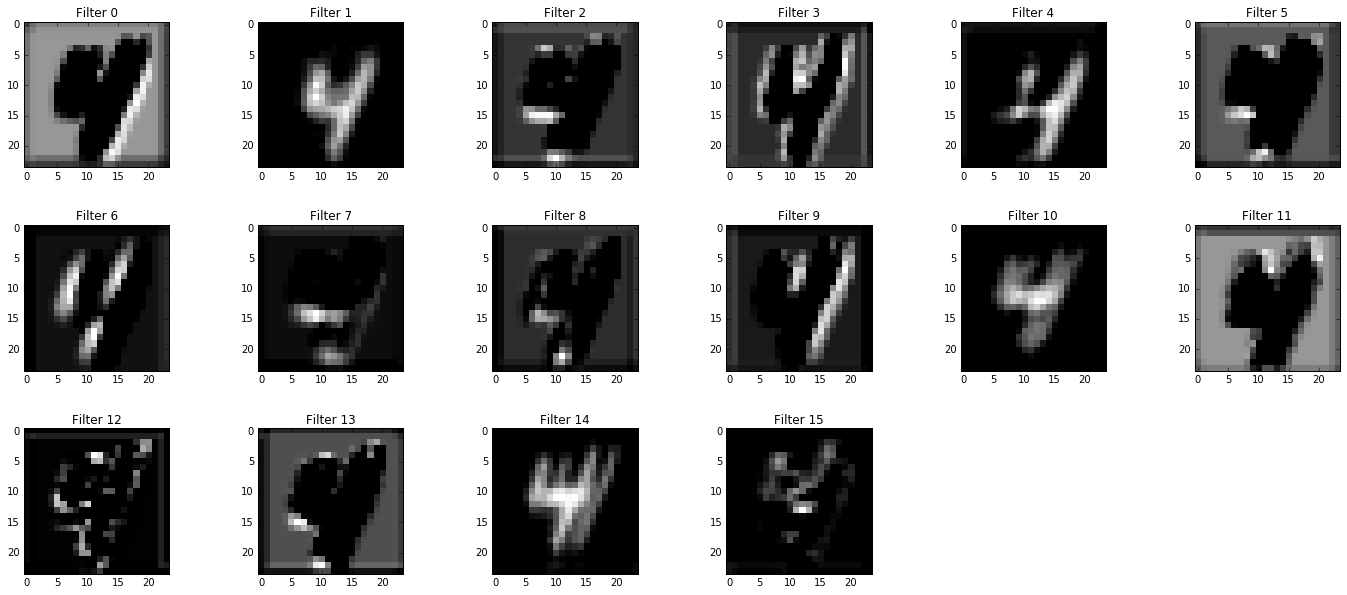

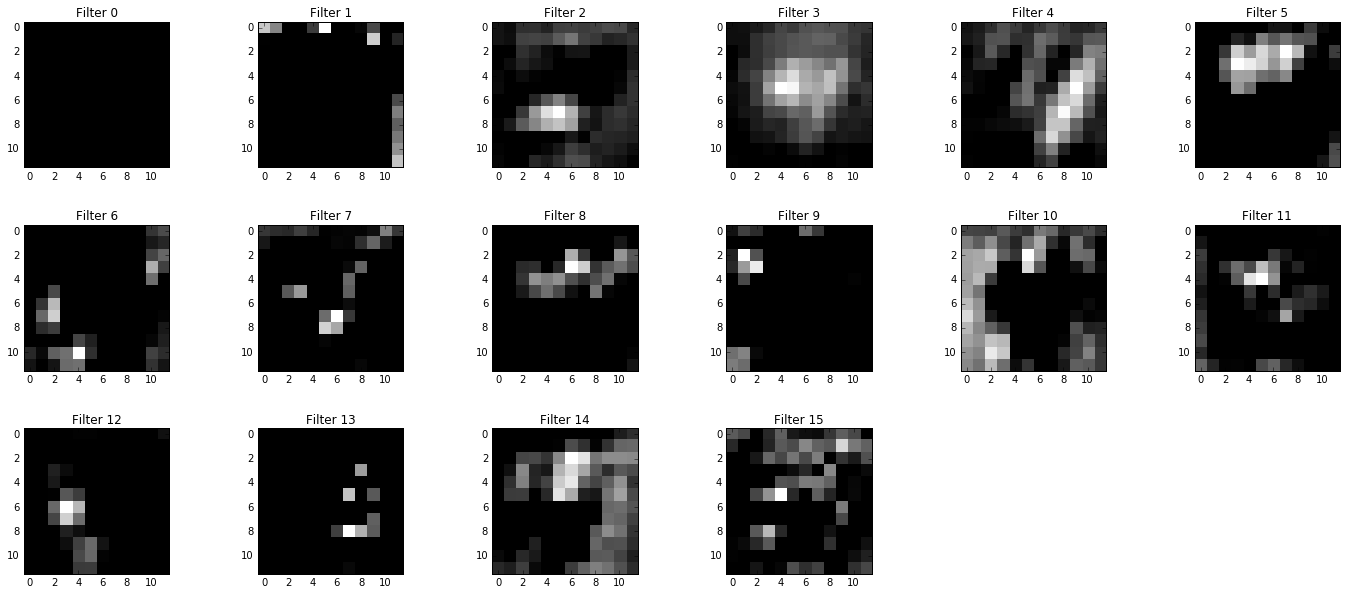

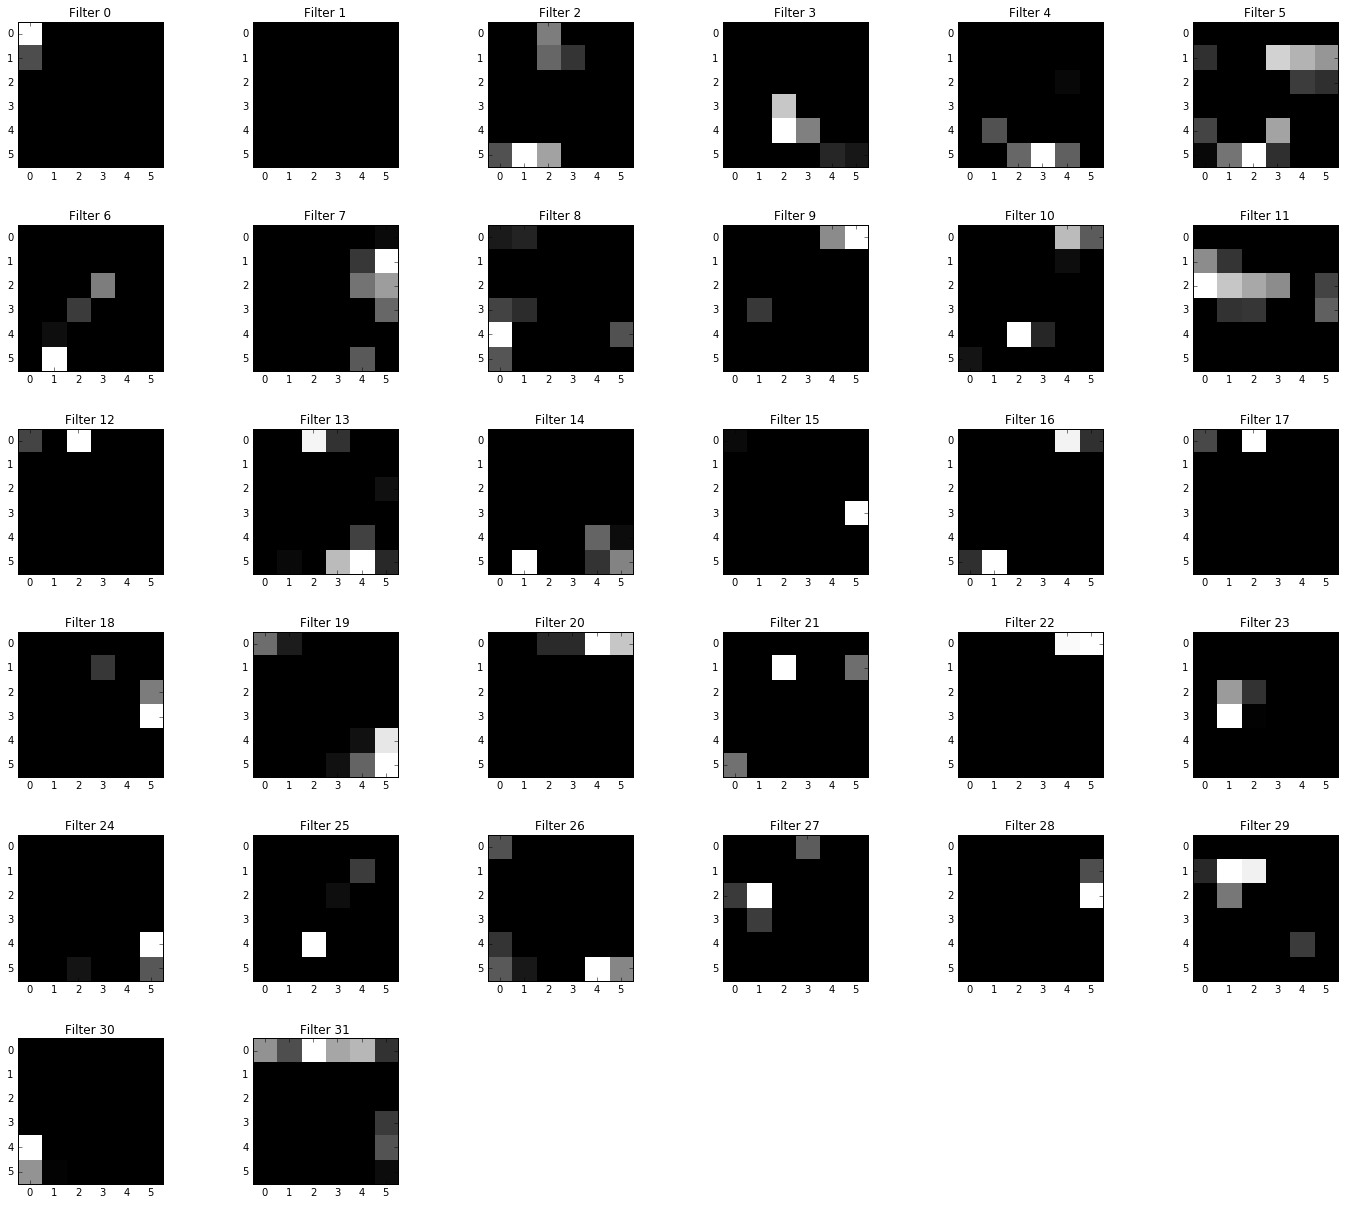

img_6.png


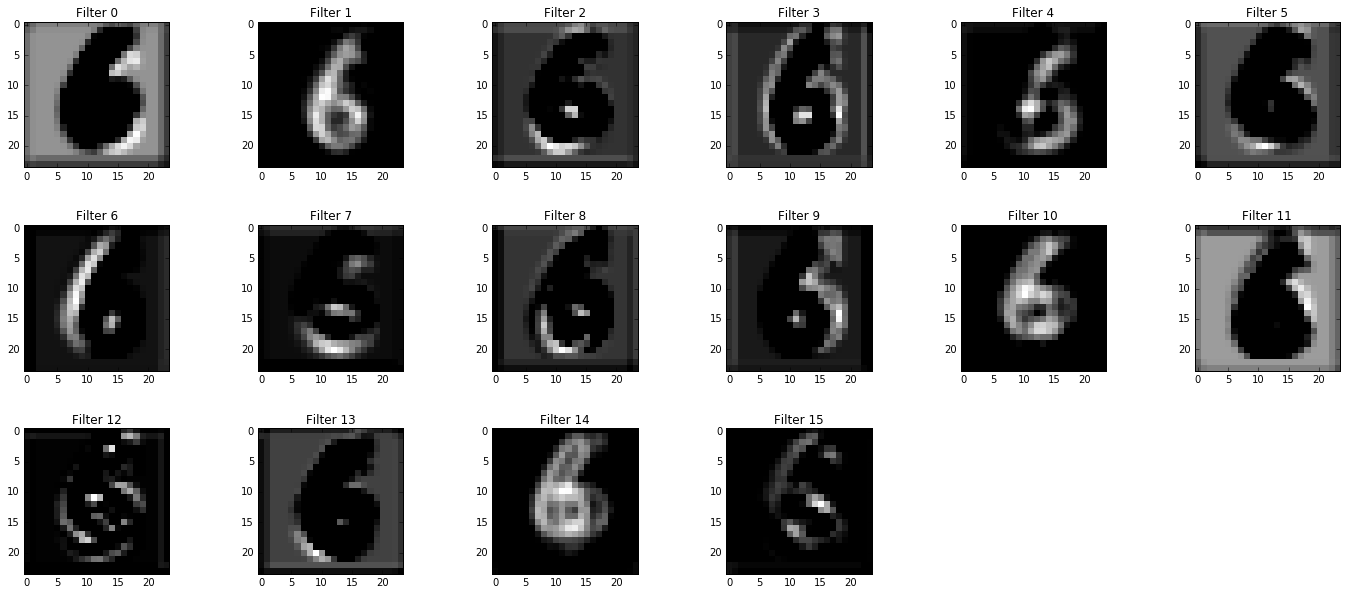

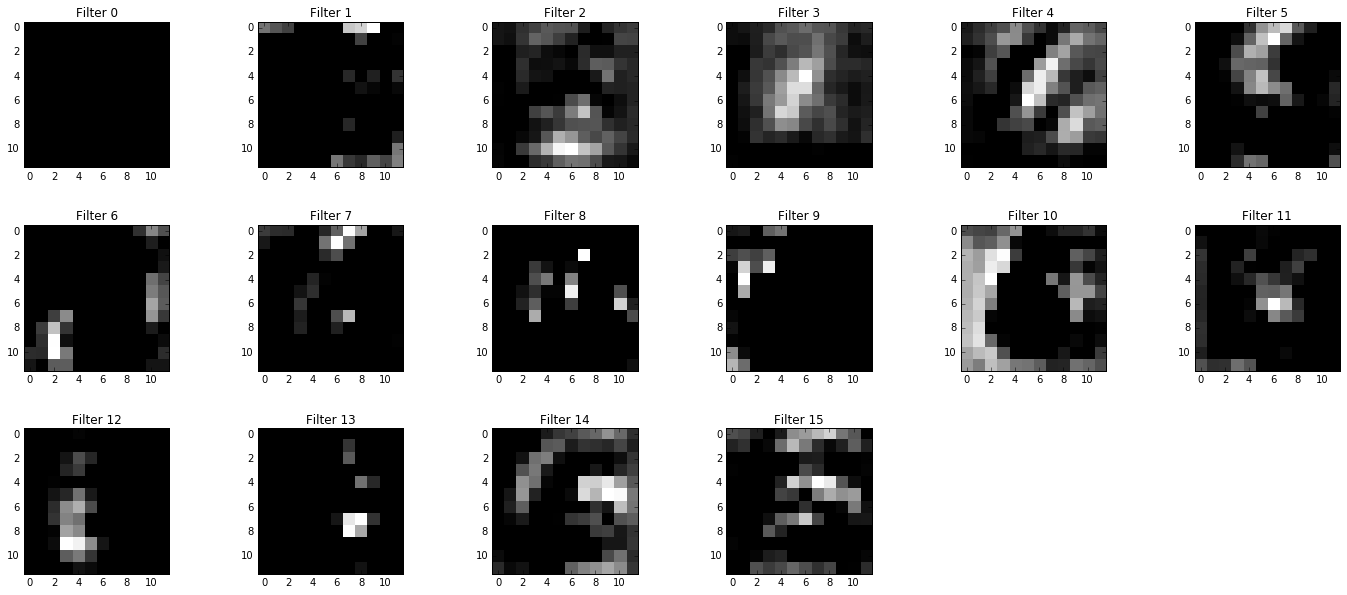

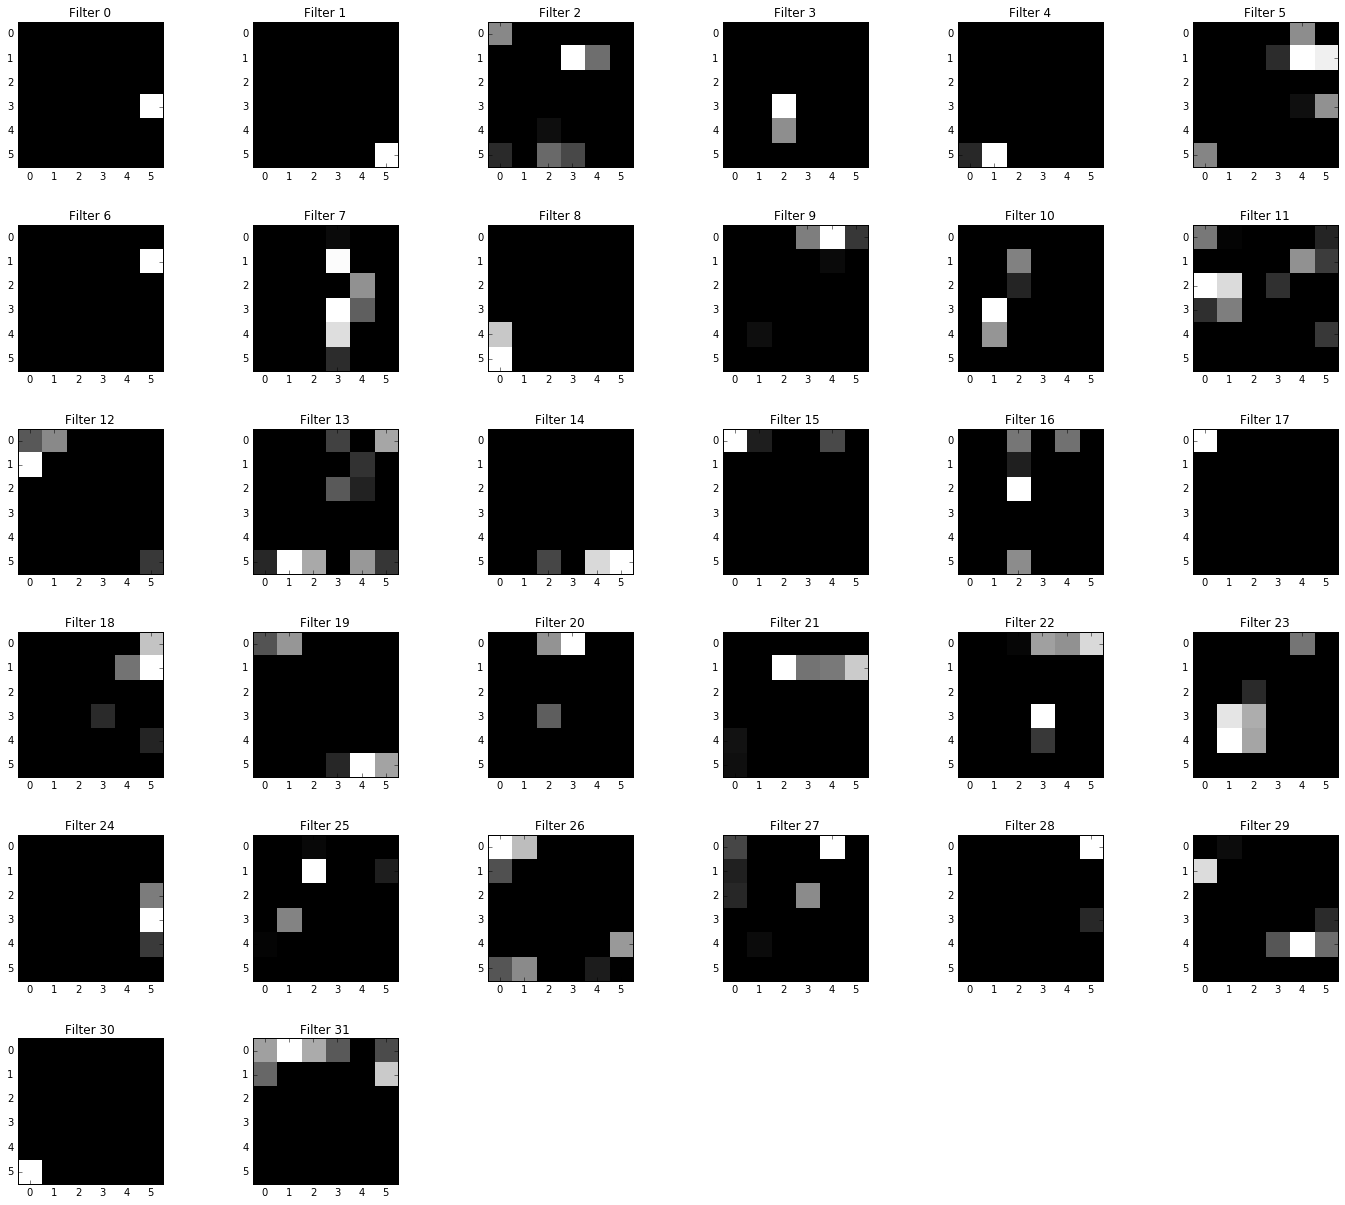

img_7.png


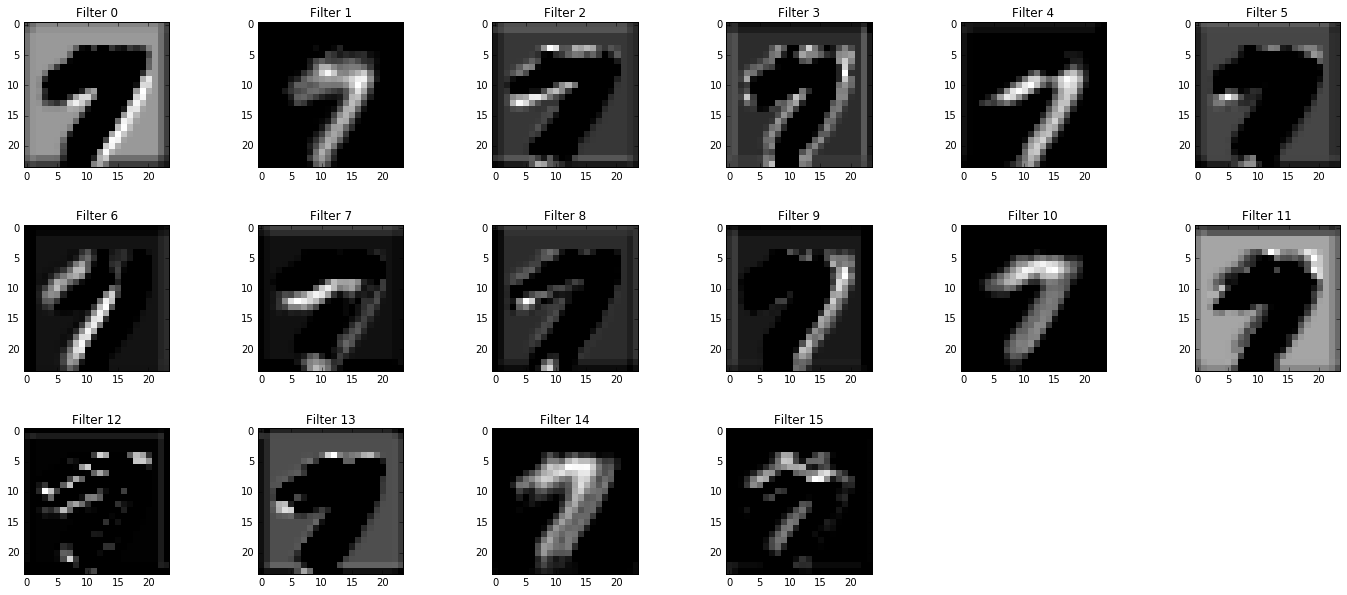

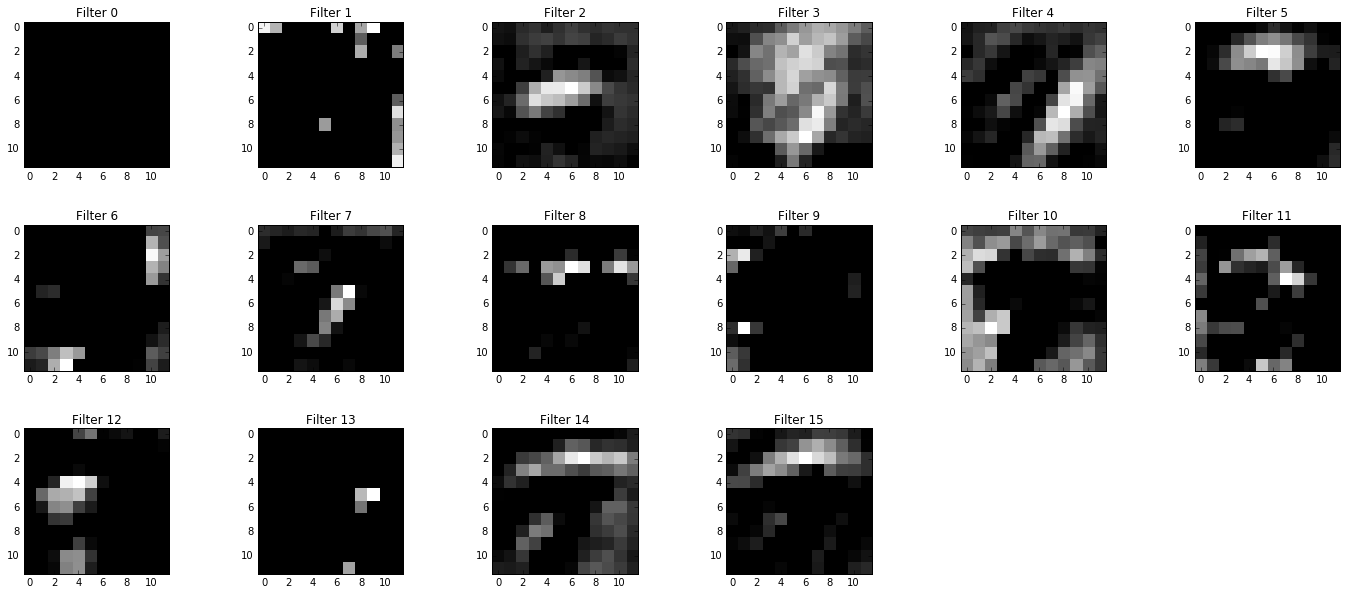

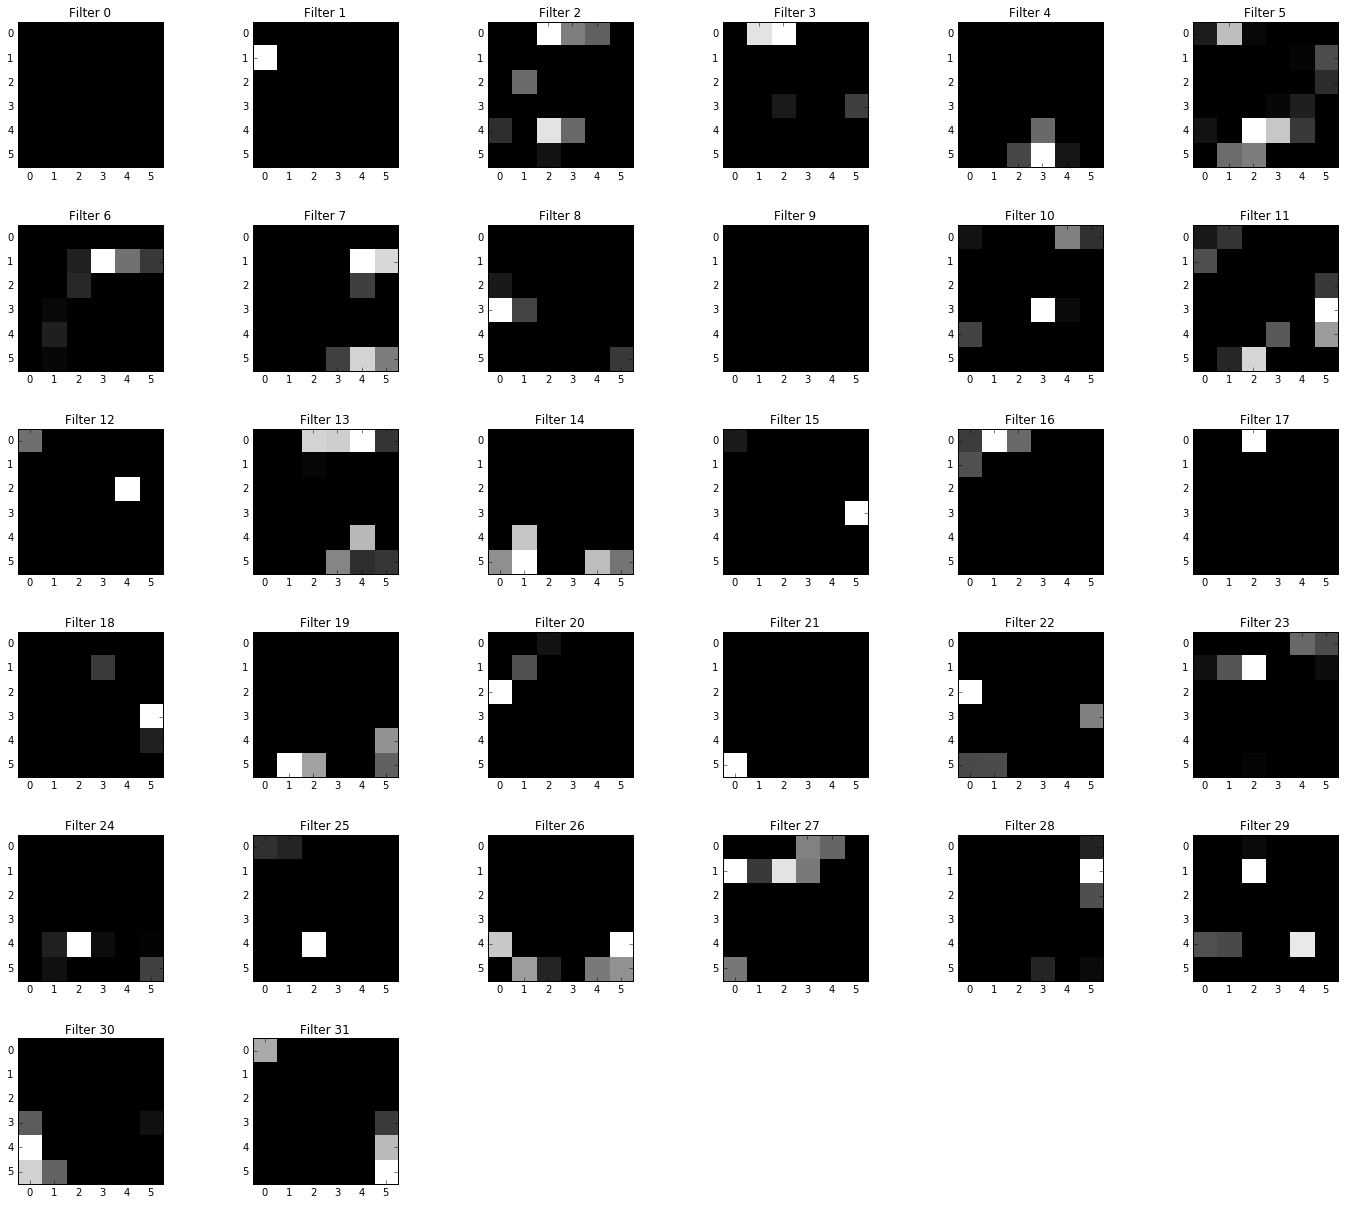

img_5.png


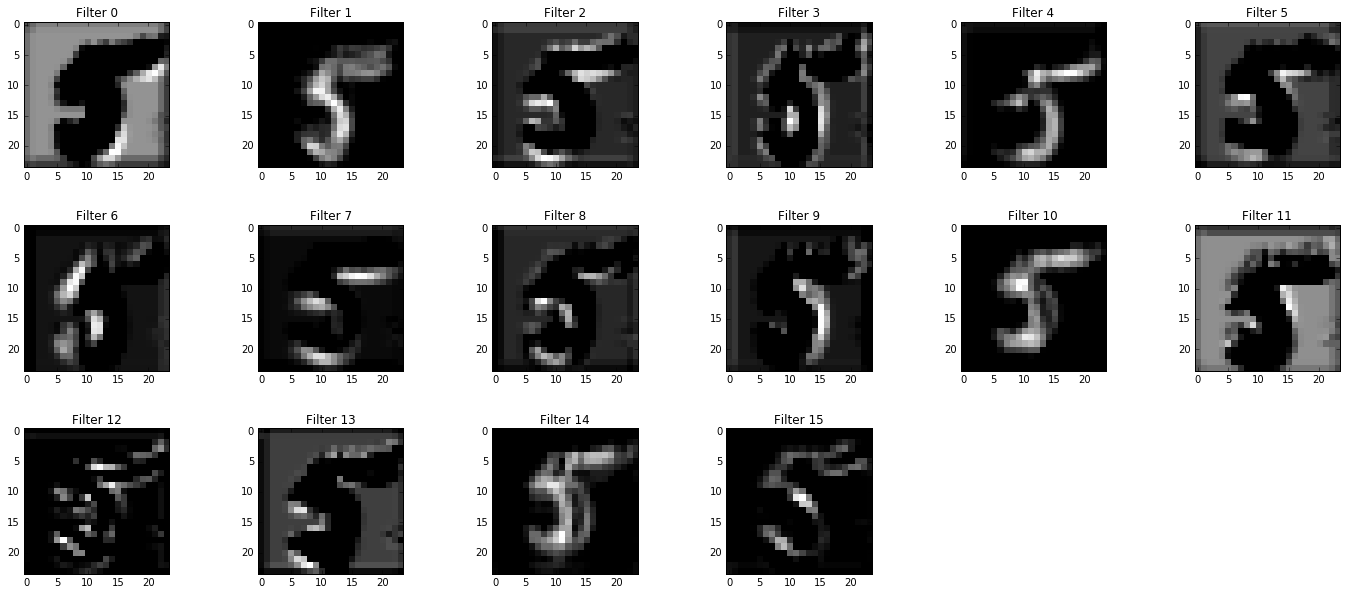

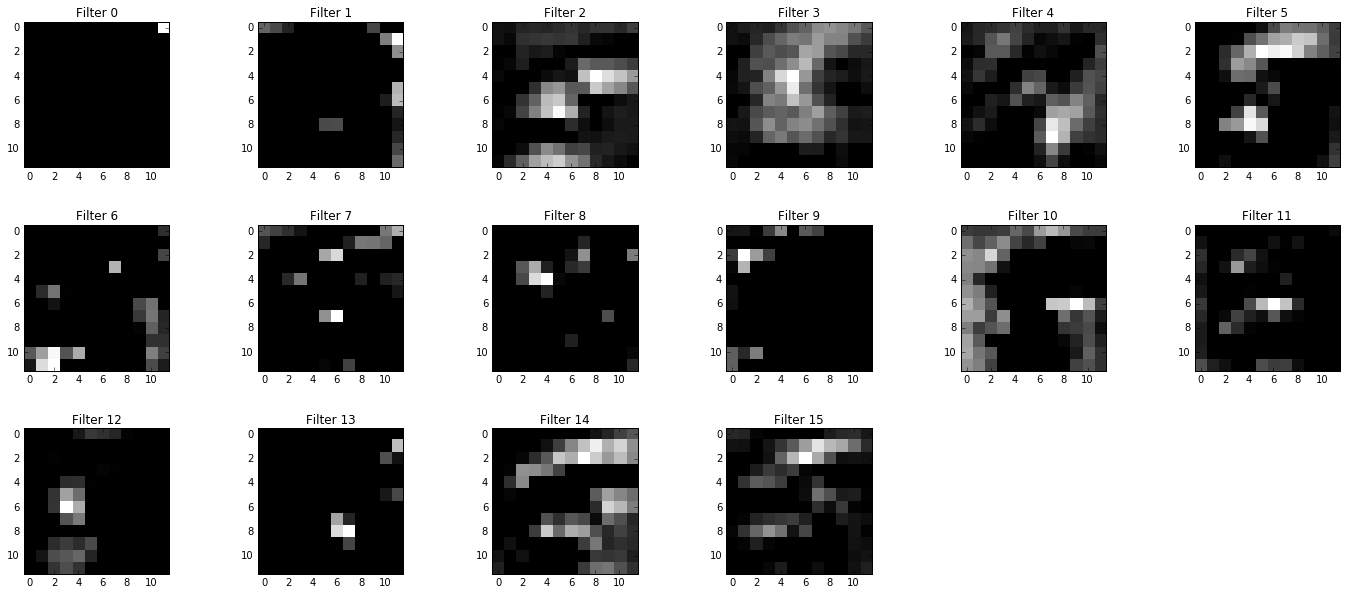

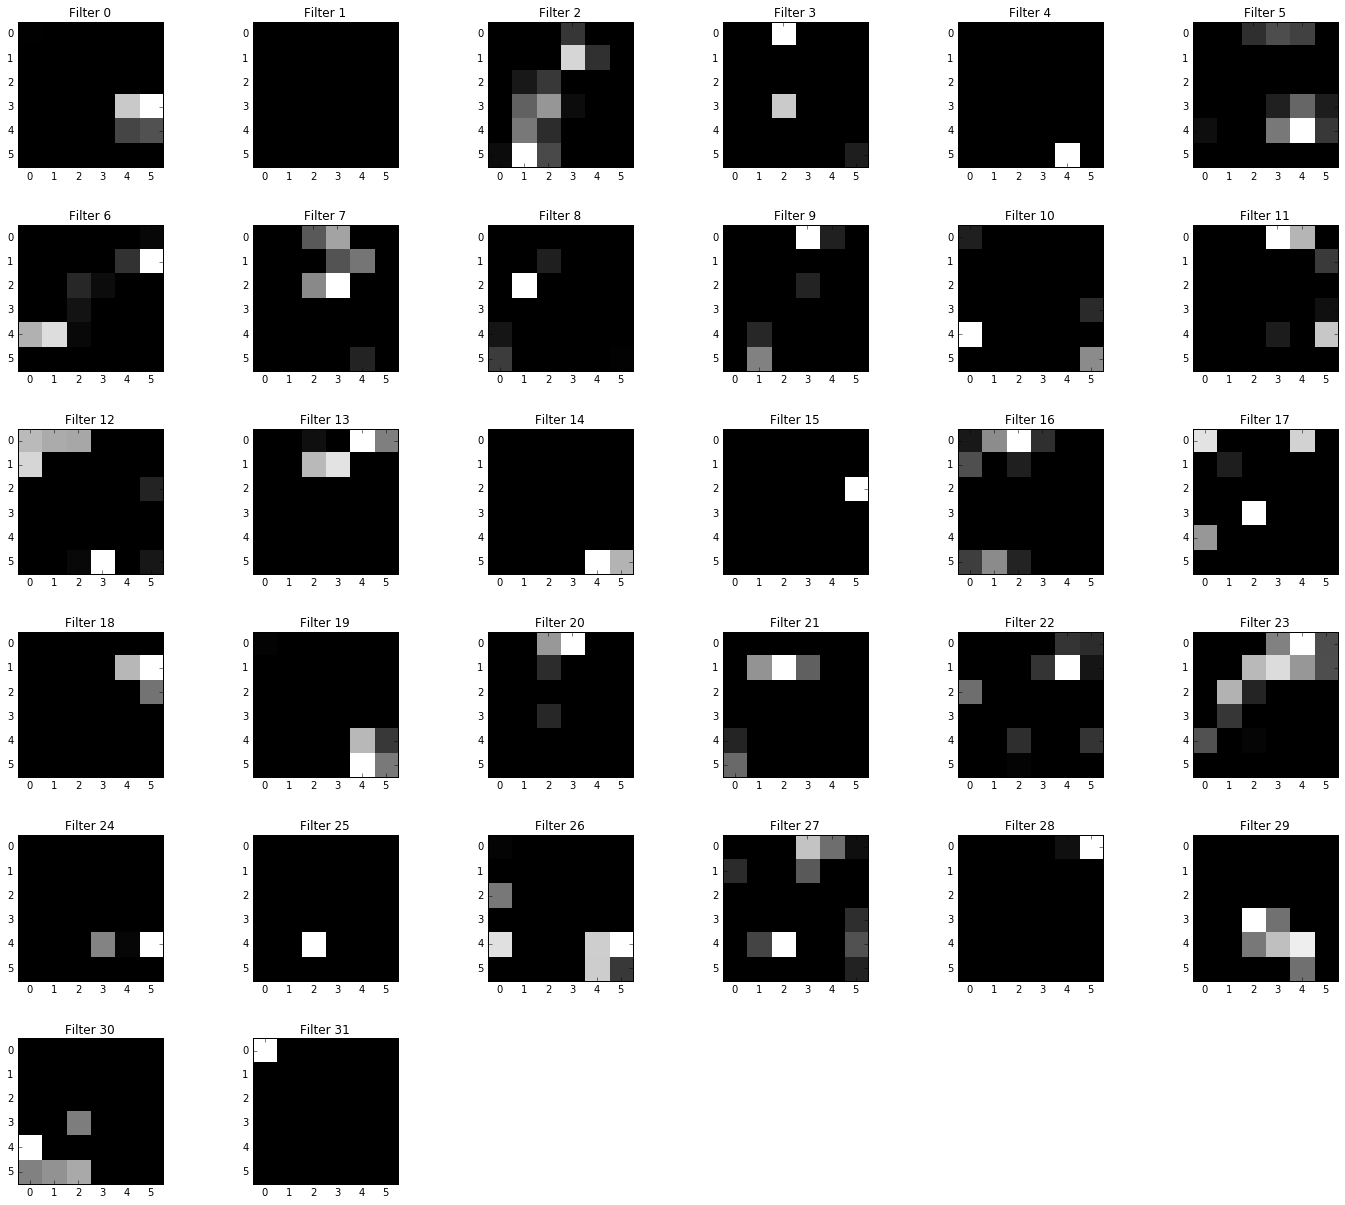

img_8.png


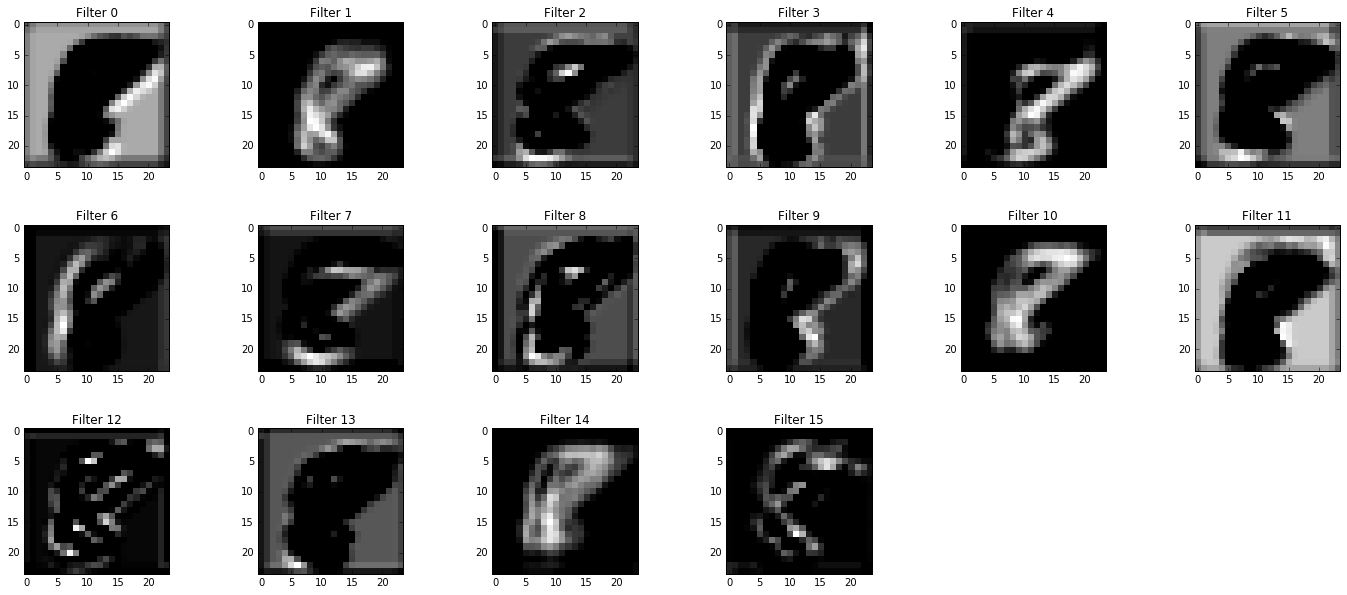

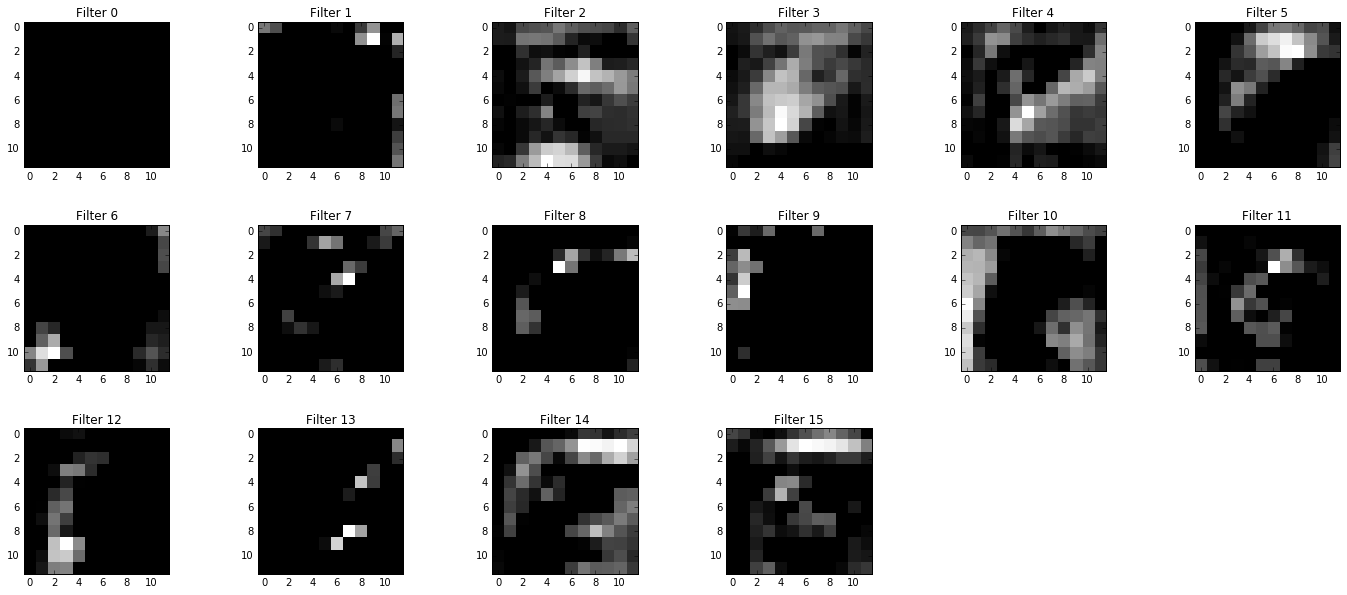

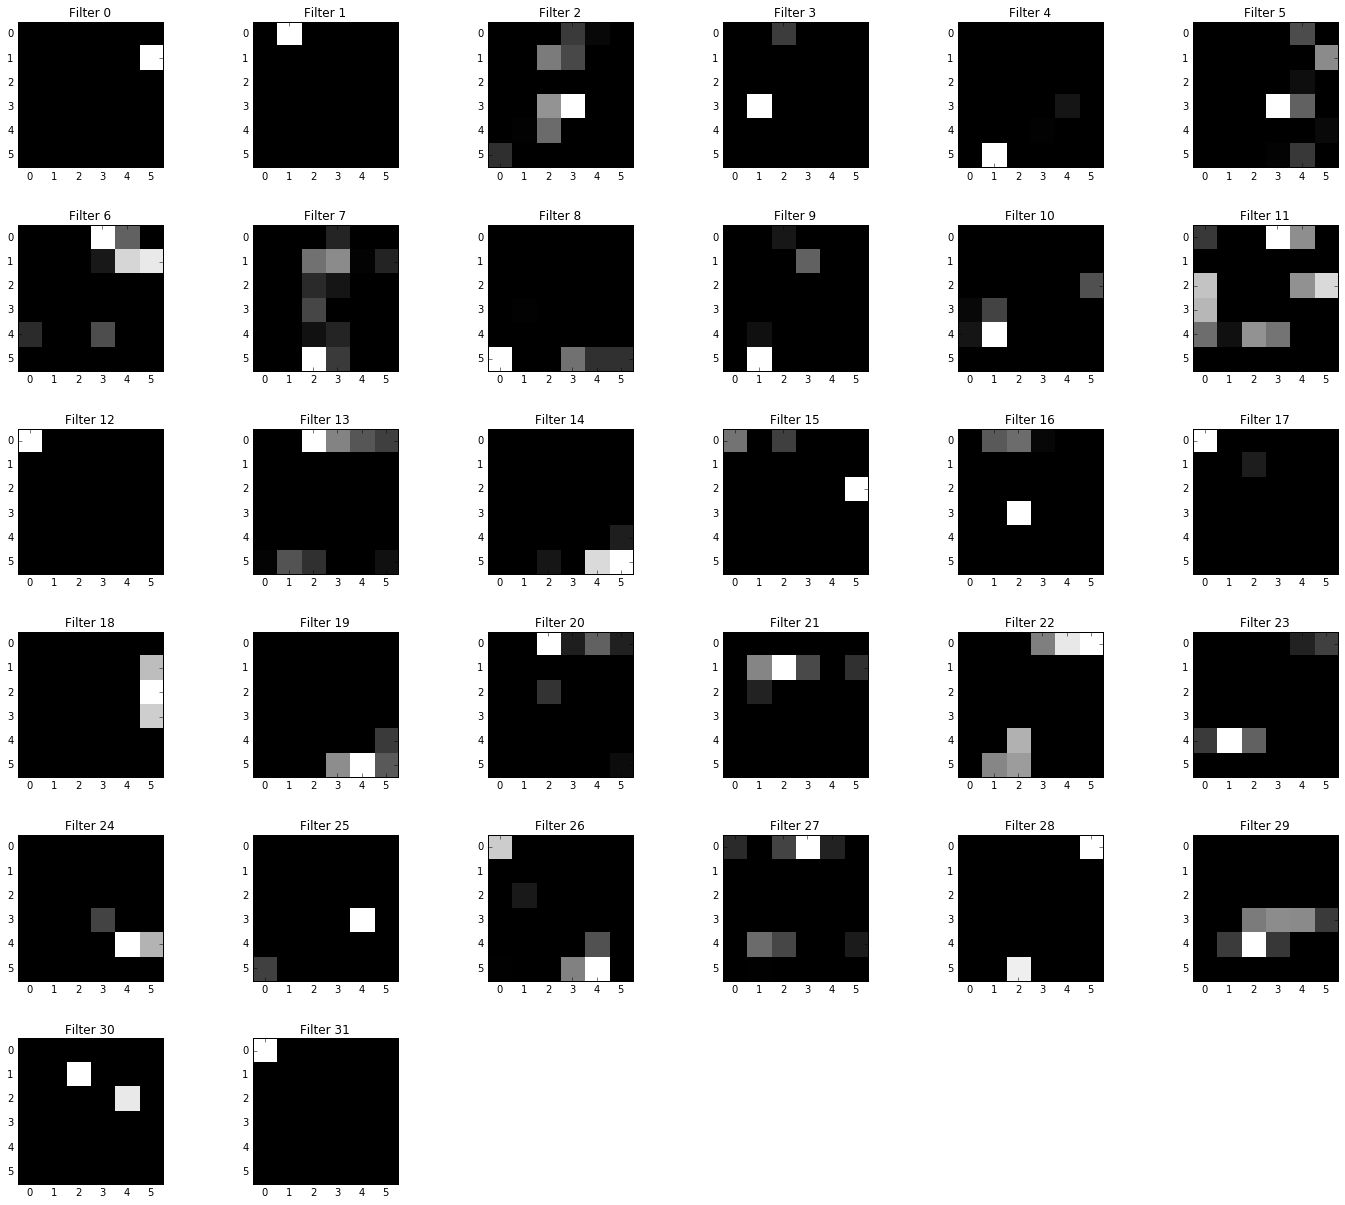

img_3.png


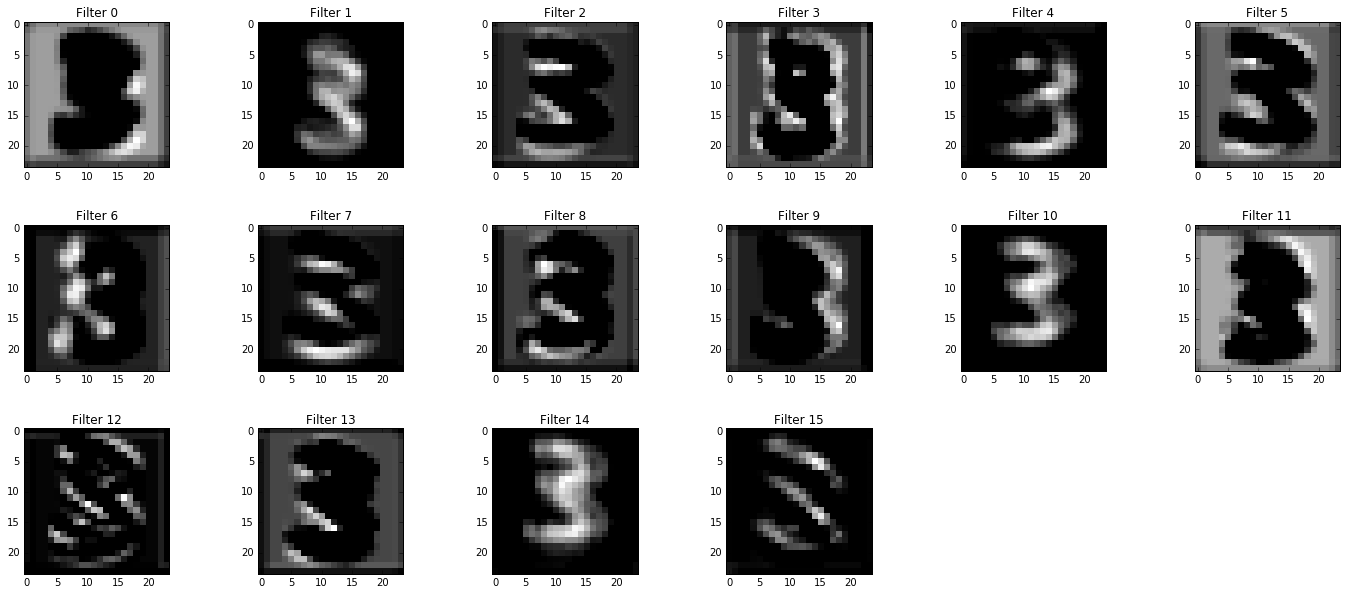

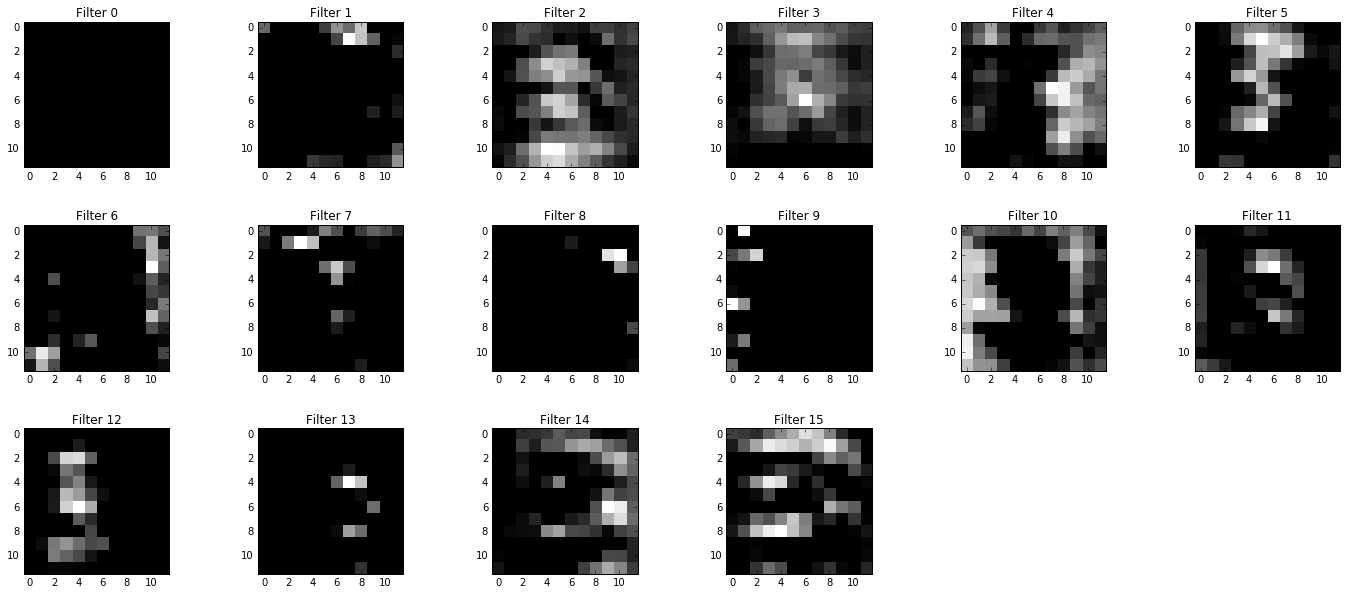

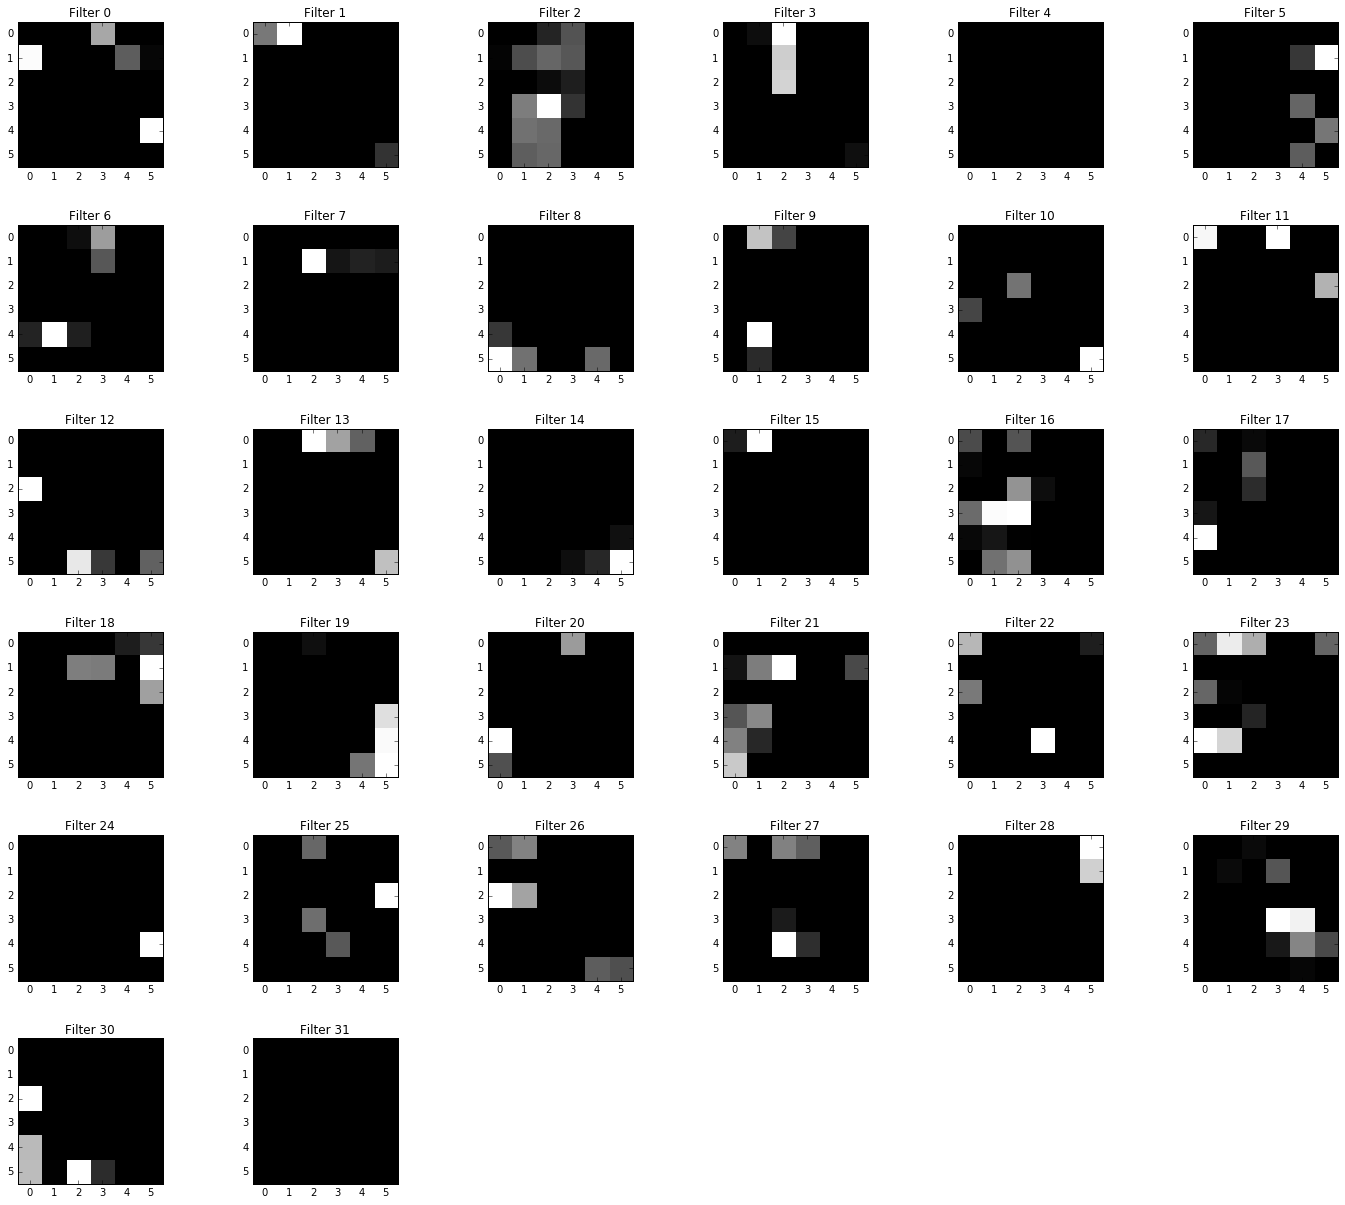

img_1.png


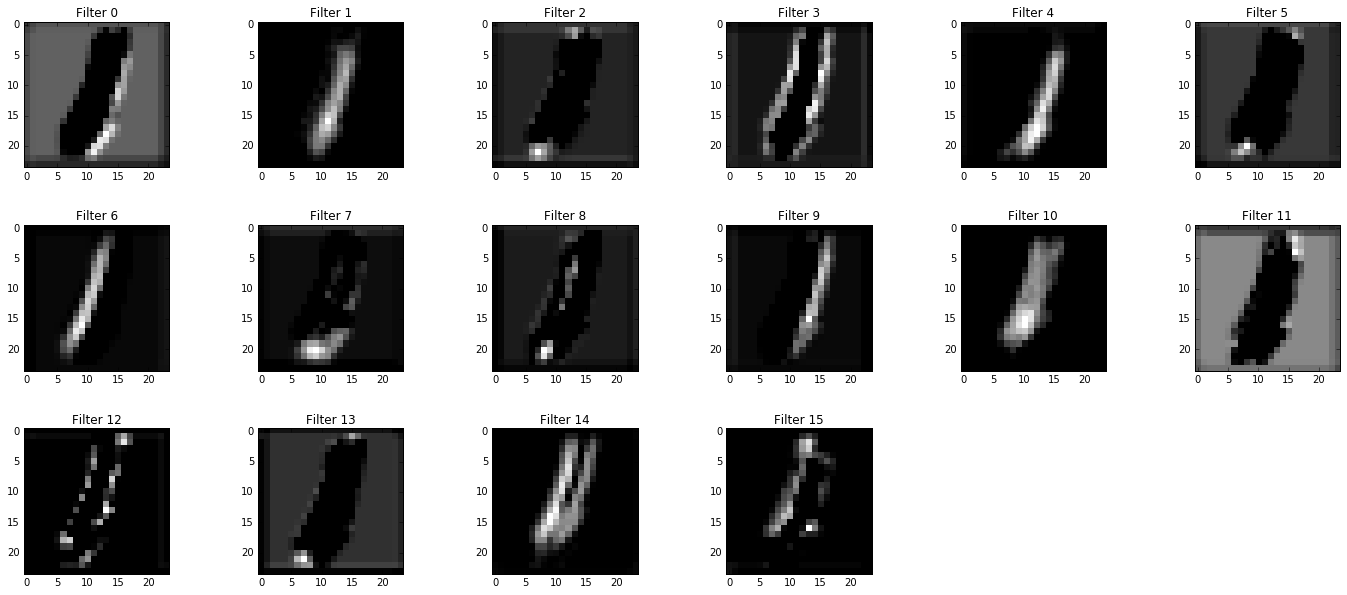

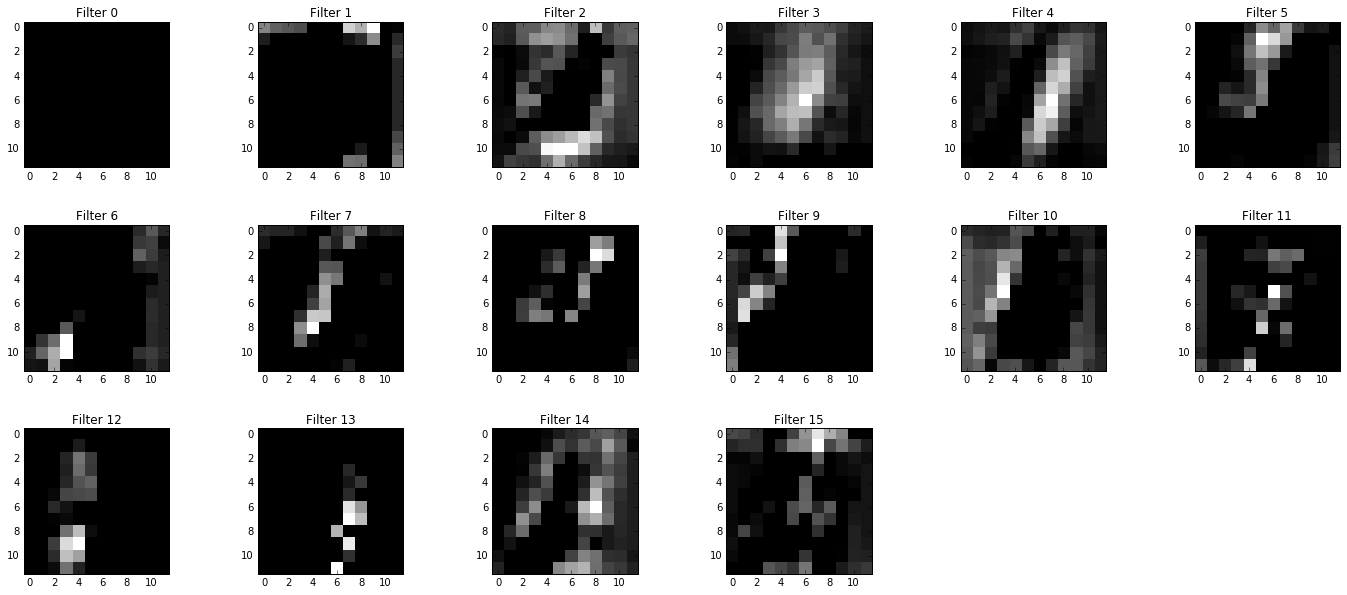

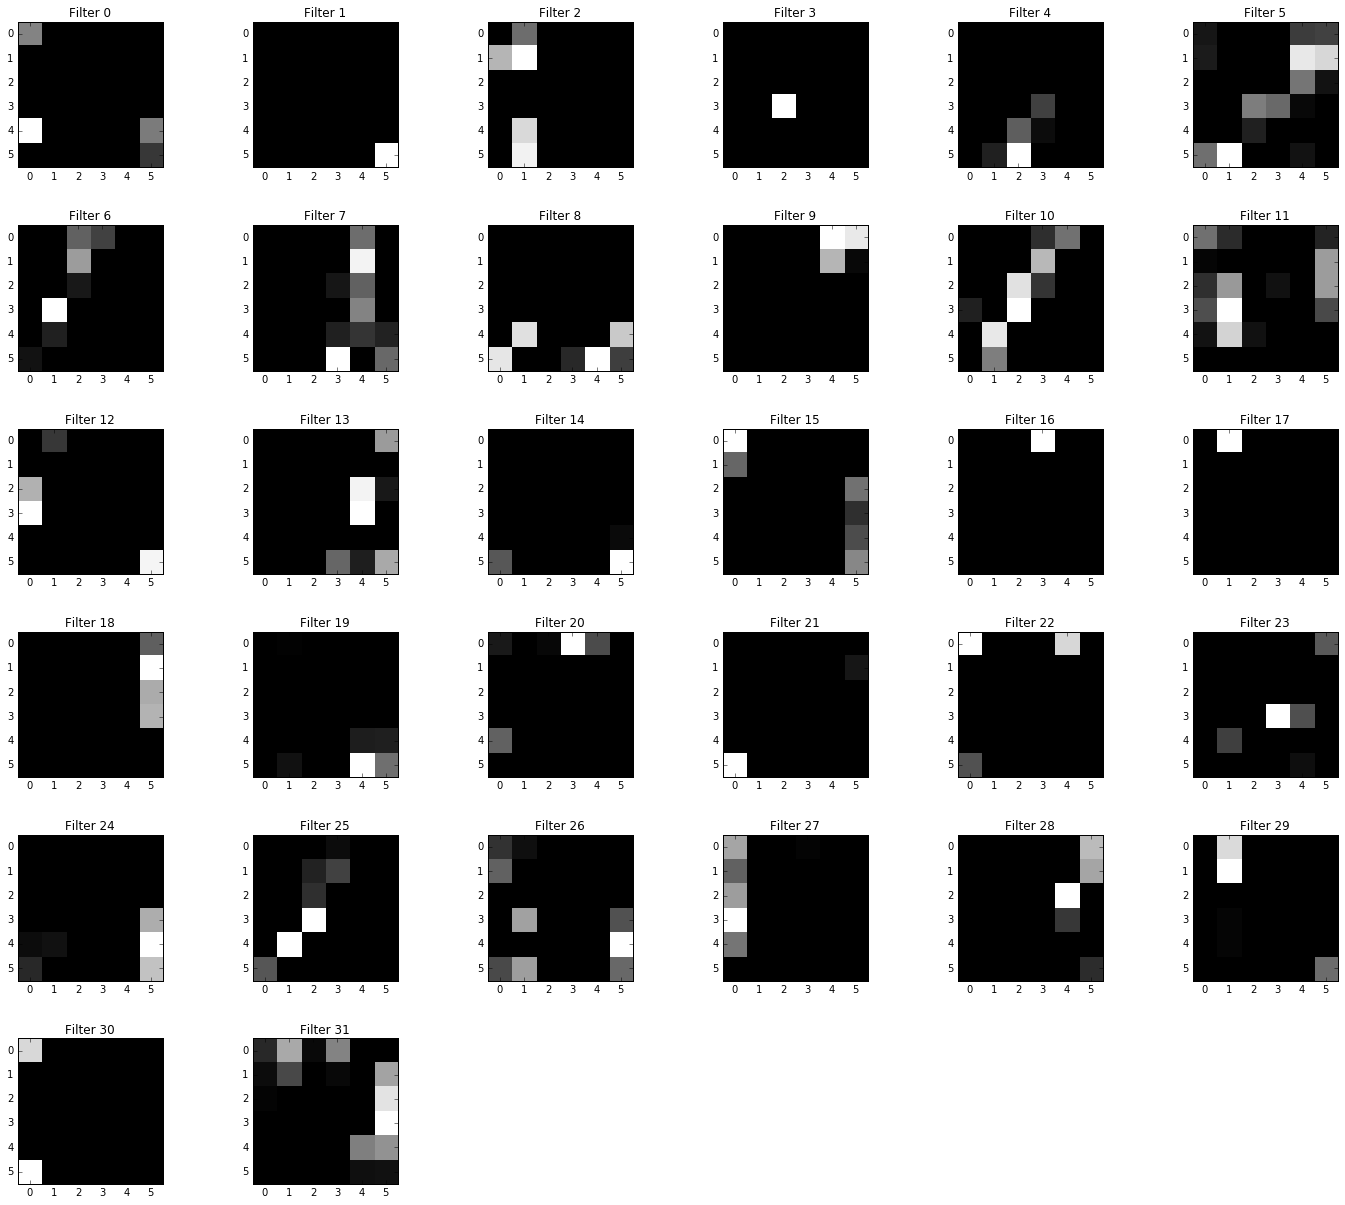

In [10]:
from visualize_activations import visualize_activations

visualize_activations()

## Visualizing the Trained Network through Semantic Segmentation

This piece of code throws an image through the network with varying input sizes and and up-samples and combines the predictions. This gives us a heatmap representation of the features that were learned and which ones are robust and specific.

(80, 192)
[1, 8, 22, 10]
80
(82, 196)
[1, 9, 23, 10]
82
(84, 201)
[1, 9, 24, 10]
84
(86, 206)
[1, 9, 24, 10]
86
(88, 211)
[1, 9, 25, 10]
88
(90, 216)
[1, 10, 25, 10]
90
(92, 220)
[1, 10, 26, 10]
92
(94, 225)
[1, 10, 27, 10]
94
(96, 230)
[1, 10, 27, 10]
96
(98, 235)
[1, 11, 28, 10]
98
(100, 240)
[1, 11, 28, 10]
100
(102, 244)
[1, 11, 29, 10]
102
(104, 249)
[1, 11, 30, 10]
104
(106, 254)
[1, 12, 30, 10]
106
(108, 259)
[1, 12, 31, 10]
108
(110, 264)
[1, 12, 31, 10]
110
(112, 268)
[1, 12, 32, 10]
112
(114, 273)
[1, 13, 33, 10]
114
(116, 278)
[1, 13, 33, 10]
116
(118, 283)
[1, 13, 34, 10]
118
(120, 288)
[1, 13, 34, 10]
120


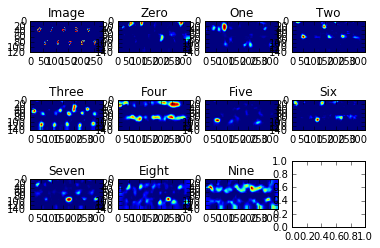

In [11]:
from plot_semantic_segmentation import create_ss_plots

create_ss_plots()